<a href="https://colab.research.google.com/github/jonhsel/Data-Science/blob/master/S%C3%A3o_Lu%C3%ADs_An%C3%A1lise_de_Viol%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left><img alt="Jonh Selmo" width="40%" src="http://jonhselmo.com.br/wp-content/uploads/2020/06/LOGO-JONH-SELMO-1.png"></center>

by [jonhselmo](https://jonhselmo.com.br)

# ANÁLISE DA CRIMINALIDADE NA GRANDE ILHA DE  SÃO LUÍS / MA

<center><img alt="São Luís" width="60%" src="https://i.pinimg.com/originals/43/c7/cb/43c7cbb6c4d9399e8750835388c5ffde.jpg"></center>

São Luís, frequentemente chamado de São Luís do Maranhão, é  a capital do estado do Maranhão. 

São Luís é a única cidade brasileira fundada por franceses, no dia 8 de setembro de 1612, posteriormente invadida por holandeses e por fim colonizada pelos portugueses. 

No ano de 1997 o centro histórico da cidade foi declarado patrimônio cultural da humanidade pela UNESCO.

Localiza-se na ilha de Upaon-Açu no Atlântico Sul, entre as baías de São Marcos e São José de Ribamar, no Golfão Maranhense. Mas além do município de São Luís, a ilha de Upaon-Açu possui os municípios de São José de Ribamar, Paço do Lumiar e Raposa.

Na análise, serão utilizados dados de todos os municípios que integram a Grande Ilha.




<center><img alt="Grande Ilha de São Luís" width="60%" src="https://www.researchgate.net/profile/Zafira_Almeida/publication/317254654/figure/fig5/AS:628869992312832@1526945698883/Figura-1-Localizacao-da-Ilha-de-Sao-Luis-MA-Brasil.png"><legend</center>

Fonte: [link](https://www.researchgate.net/profile/Zafira_Almeida/publication/317254654/figure/fig5/AS:628869992312832@1526945698883/Figura-1-Localizacao-da-Ilha-de-Sao-Luis-MA-Brasil.png)







# FONTE DE DADOS

Os dados utilizados são as ocorrências de MVI para o município de São Luís monitorados pelo Centro de Apoio Operacional Criminal, do Ministério Público do Estado do Maranhão, do período de 2017 a 2020.



## MVI

A metodologia MVI (Mortes Violentas Intencionais) é a forma utilizada Instituto de Pesquisas Econômicas Aplicada (IPEA) e pelo Fórum Brasileiro de Segurança Pública (FSBP) para a elaboração dos “Atlas da Violência”. Os MVIs contemplam, como forma de mortalidade violenta, os homicídios dolosos, latrocínios (roubos seguidos de morte), lesões corporais seguida de morte, vitimização policial, mortes decorrentes de intervenção policial, lesões com morte posterior, mortes em estabelecimentos prisionais e mortes a esclarecer com indícios de crime.

## DATASET

Abaixo temos a definicção do caminho do dataset.

In [1]:
#importação de bibliotecas necessárias
import pandas as pd

df_vslz = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset/MVIMPMA.csv')

Verificação das primeiras 05 lihas do dataframe.

In [2]:
#visualização das 05 primeiras entradas
df_vslz.head()

,ID,Vítima,Data,Sexo,Idade,Horário,CAUSA DA MORTE,Local,Município,Classificação
0,1,Joseilton Silva,01/01/2017,masculino,22.0,03:01:00,ARMA BRANCA,Coroadinho,São Luís,HOMICÍDIO DOLOSO
1,2,Diogo Silva Ferreira,01/01/2017,masculino,30.0,00:21:00,ARMA DE FOGO,Liberdade,São Luís,HOMICÍDIO DOLOSO
2,3,Jadiel Pinheiro,01/01/2017,masculino,23.0,18:30:00,ARMA DE FOGO,São Raimundo,São Luís,HOMICÍDIO DOLOSO
3,4,Ismael Ribeiro Rocha,01/01/2017,masculino,38.0,20:21:00,ARMA DE FOGO,Vila Conceição – Coroadinho,São Luís,HOMICÍDIO DOLOSO
4,5,Ana Celia Reis Sousa,01/01/2017,feminino,49.0,23:22:00,ARMA DE FOGO,Vila Vitória,São Luís,HOMICÍDIO DOLOSO


In [3]:
df_vslz.tail()

,ID,Vítima,Data,Sexo,Idade,Horário,CAUSA DA MORTE,Local,Município,Classificação
1531,1532,Eduardo Henrique Maramaldo,26/05/2020,masculino,24.0,19:30:00,ARMA DE FOGO,Barramar,São Luís,HOMICÍDIO DOLOSO
1532,1533,Fredison Alan Serra Abreu,26/05/2020,masculino,34.0,18:30:00,ARMA DE FOGO,Vila Cafeteira,São José de Ribamar,HOMICÍDIO DOLOSO
1533,1534,Joana Maria Diniz,26/05/2020,feminino,66.0,10:00:00,OUTROS MEIOS,Recanto dos Signos,São Luís,HOMICÍDIO DOLOSO
1534,1535,Jadiel Coelho Silva,31/05/2020,masculino,17.0,15:53:00,ARMA DE FOGO,Cidade Operária,São Luís,HOMICÍDIO DOLOSO
1535,1536,M. E. T. de O.,31/05/2020,masculino,15.0,15:53:00,ARMA DE FOGO,Cidade Operária,São Luís,HOMICÍDIO DOLOSO


##Quantidade de registros


Verificação do quantitativo de registros.

In [4]:
print('Quantidade de linhas:  {}'.format(df_vslz.shape[0]))
print('Quantidade de colunas: {}'.format(df_vslz.shape[1]))

Quantidade de linhas:  1536
Quantidade de colunas: 10


# TIPOS DE DADOS

A verificação dos tipos de dados é realizado pelo código abaixo:

In [5]:
#tipos dos dados das colunas
df_vslz.dtypes

ID                  int64
Vítima             object
Data               object
Sexo               object
Idade             float64
Horário            object
CAUSA DA MORTE     object
Local              object
Município          object
Classificação      object
dtype: object

Percebe-se que os campos Data, Horário e Idade estão com tipos de dados inadequados.
* `Data` - Apresenta tipo ***`string`*** (texto) quando deveria ser do tipo ***`datetime`*** (formato adequado para datas e horários;
* `Horário`- Apresenta tipo ***`string`*** (texto) quando deveria ser do tipo ***`datetime`*** (formato adequado para datas e horários;

## Adequação de tipos de dados indevidos

Depois de verificados os tipos de dados inadequados, o acerto se da a partir dos procedimentos abaixo:
 

In [6]:
#modificação dos tipos de dados

#acerto da coluna Data para o tipo de dado 'datetime'
df_vslz['Data'] = pd.to_datetime(df_vslz['Data'], format= '%d/%m/%Y')

#acerto da coluna Horário para o tipo de dado 'datetime'
df_vslz['Horário'] = pd.to_datetime(df_vslz['Horário'], format='%H:%M:%S')


Verificando novamente os tipos, para constatar as **alterações**


In [7]:
df_vslz.dtypes

ID                         int64
Vítima                    object
Data              datetime64[ns]
Sexo                      object
Idade                    float64
Horário           datetime64[ns]
CAUSA DA MORTE            object
Local                     object
Município                 object
Classificação             object
dtype: object

##Dicionário de *dados*

A instrução abaixo permite verificar os nomes das colunas do *data frame*.

In [8]:
df_vslz.columns

Index(['ID', 'Vítima', 'Data', 'Sexo', 'Idade', 'Horário', 'CAUSA DA MORTE',
       'Local', 'Município', 'Classificação'],
      dtype='object')

Renomear coluna `CAUSA DA MORTE` para `Causa_morte`.

In [9]:
#remomear coluna
df_vslz.rename(columns={'CAUSA DA MORTE': 'Causa_morte'}, inplace=True)

#visualizar as modificações
df_vslz.columns

Index(['ID', 'Vítima', 'Data', 'Sexo', 'Idade', 'Horário', 'Causa_morte',
       'Local', 'Município', 'Classificação'],
      dtype='object')

Com os nomes das colunas, vamos definir o dicionário dos dados.

* `Data` (datetime)- Data da ocorrência do fato;
* `Sexo` (string)- Gênero da vítima;
* `Idade`(string) - Idade da vítima;
* `Horário` (datetime)- Horário da ocorrência do fato;
* `Causa_morte` (string) -  Especificação da causa ou do instrumento utilizado;
    * ARMA DE FOGO;
    * ARMA BRANCA;
    * ESPANCAMENTO;
    * ESTRANGULAMENTO;
    * OUTROS MEIOS;
* `Local` (string)- Bairro ou localidade da ocorrência;
* `Município` (string)- Município da Grande Ilha de São Luís;
* `Classificação`(string) - Classificação da ocorrência
    * HOMICÍDIO DOLOSO;
    * LESÃO CORPORAL SEGUIDA DE MORTE;
    * LATROCÍNIO;
    * MORTE DECORRENTE DE INTERVENÇÃO POLICIAL;
    * MORTE A ESCLARECER (COM INDÍCIOS DE MVI);
    * MORTE POSTERIOR (COM INDÍCIOS DE MVI)

#VERIFICAÇÃO DE VALORES AUSENTES

Valores ausentes influenciam na criação de modelos, distorcendo análises. Por vezes temos que decidir se os registros (linhas) devem ser excluídos ou preenchidos por algum valor, seja ele uma definição de ausente ou algum parâmetro estatístico (moda, mediana, média).

No caso deste dataset optei por preencher o valor faltante por UNKNOWN (desconhecido), para não ter que excluir uma vítima.

##Quantitativos

Nos códigos abaixo verificamos o quantitativo de valores ausentes e o percentual desses valores frente ao total de registros.

In [10]:
#verificação dos valores ausentes

for i in df_vslz.columns:
    print('Valores ausentes em ' + i +': {}'.format(df_vslz[i].isnull().sum()))

Valores ausentes em ID: 0
Valores ausentes em Vítima: 70
Valores ausentes em Data: 0
Valores ausentes em Sexo: 3
Valores ausentes em Idade: 14
Valores ausentes em Horário: 25
Valores ausentes em Causa_morte: 0
Valores ausentes em Local: 1
Valores ausentes em Município: 1
Valores ausentes em Classificação: 1


##Percentuais

In [11]:
#porcentagem de valores ausentes
porcentagem = df_vslz[i].isnull().sum()/ df_vslz.shape[0]
for i in df_vslz.columns:
    print('Valores ausentes em ' + i + ': {:,.2f}% '.format(df_vslz[i].isnull().sum()/ df_vslz.shape[0] * 100))

Valores ausentes em ID: 0.00% 
Valores ausentes em Vítima: 4.56% 
Valores ausentes em Data: 0.00% 
Valores ausentes em Sexo: 0.20% 
Valores ausentes em Idade: 0.91% 
Valores ausentes em Horário: 1.63% 
Valores ausentes em Causa_morte: 0.00% 
Valores ausentes em Local: 0.07% 
Valores ausentes em Município: 0.07% 
Valores ausentes em Classificação: 0.07% 


Observa-se que o campo `Classificação` é o que mais deve ser trabalhado, apresentando mais de 54% dos dados faltantes.

Preenchimento dos valores faltantes.

##CORRELAÇÃO

Na análise desta seção, verificaremos a correlação entre as colunas.

A correlação mede a relação de dependência entre as varíaveis, sendo extremamente útil para análises futuras utilizando técnicas de ML - Machine Learning (Aprendizagem de máquina).

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


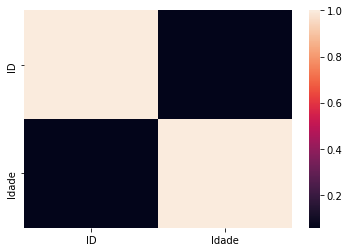

In [12]:
#para tal importaremos a biblioteca seaborn
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib notebook


fig, ax = plt.subplots()

sns.heatmap(df_vslz.corr())
plt.show()

Verificamos que o algoritimo encontrou apenas a variavel idade, por entender que apresenta valores numéricos. 

Podemos optar em realizar um mapeamento das variáveis `Sexo`, `Município`, `Causa_morte` e `Classificação` quando formos trabalhar com modelos de ML.

#AGRUPAMENTOS

Realizaremos algumas visualizações de agrupamentos.

##Totais



In [13]:
#print(df_vslz.groupby(['Município']))
df_vslz.groupby(['Município'])['ID'].count()

Município
-                         6
Paço do Lumiar          108
Raposa                   22
São José de Ribamar     228
São Luís               1171
Name: ID, dtype: int64

In [14]:
#Filtrar o valor máximo para usálo nos limites da imagem
df_vslz.groupby(['Município'])['ID'].count().max()

#atribuí-lo para variável ymaximo
ymaximo_g01 = df_vslz.groupby(['Município'])['ID'].count().max()

Foi criado novamente a rotina para o gráfico 02


In [15]:
#atribuí-lo para variável ymaximo
ymaximo_g02 = df_vslz.groupby(['Causa_morte'])['ID'].count().max()

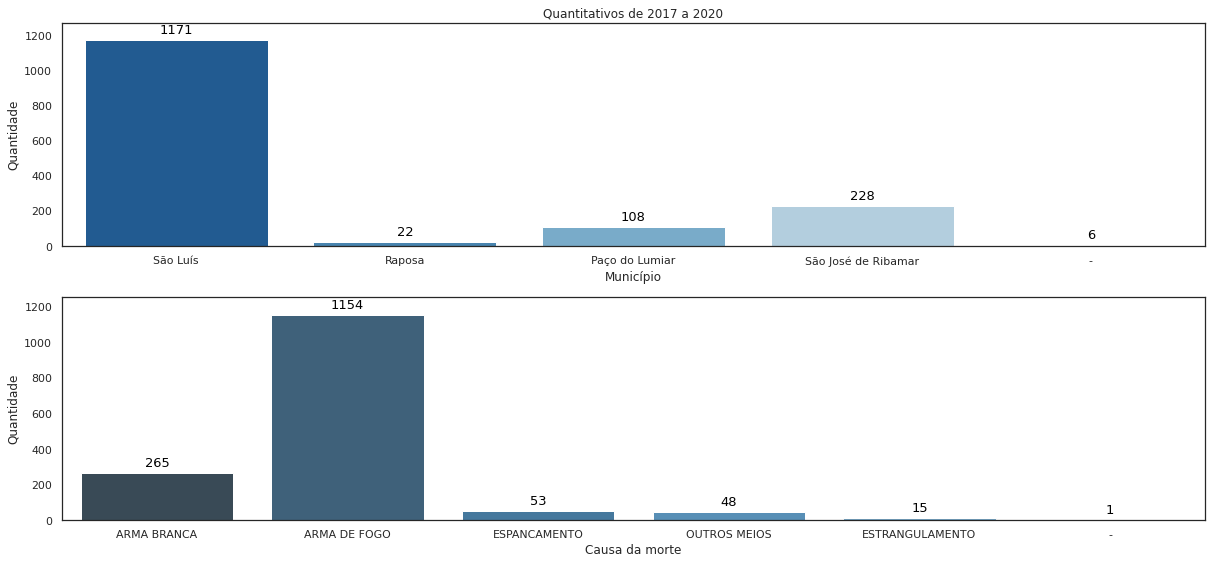

In [16]:
#ANO
sns.set(style="white")
#sns.palplot(sns.dark_palette("purple"))

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(17,8))

sns.countplot(df_vslz['Município'], palette='Blues_r', ax=ax1)
#https://seaborn.pydata.org/tutorial/color_palettes.html
ax1.set_title('Quantitativos de 2017 a 2020')
ax1.set_xlabel('Município')
ax1.set_ylabel('Quantidade')
#instrução para que o rótulo não sobreponha a grade que circunda o gráfico
ax1.set_ylim(0, ymaximo_g01 + 100)

#GRÁFICO 01
#laço para inclusão dos rótulos
for p in ax1.patches:
             #Não tulizaremos valores decimais nos rótulos
             #ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ax1.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 10),
                 textcoords='offset points')
 #To make space for the annotations

#GRÁFICO 02
sns.countplot(df_vslz['Causa_morte'], palette='Blues_d', ax=ax2)
ax2.set_xlabel('Causa da morte')
ax2.set_ylabel('Quantidade')
#instrução para que o rótulo não sobreponha a grade que circunda o gráfico
ax2.set_ylim(0, ymaximo_g02 + 100)

#laço para inclusão dos rótulos
for p in ax2.patches:
             #Não tulizaremos valores decimais nos rótulos
             #ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ax2.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 10),
                 textcoords='offset points')

fig.show()
#fig.autofmt_xdate()
fig.tight_layout()
plt.show()

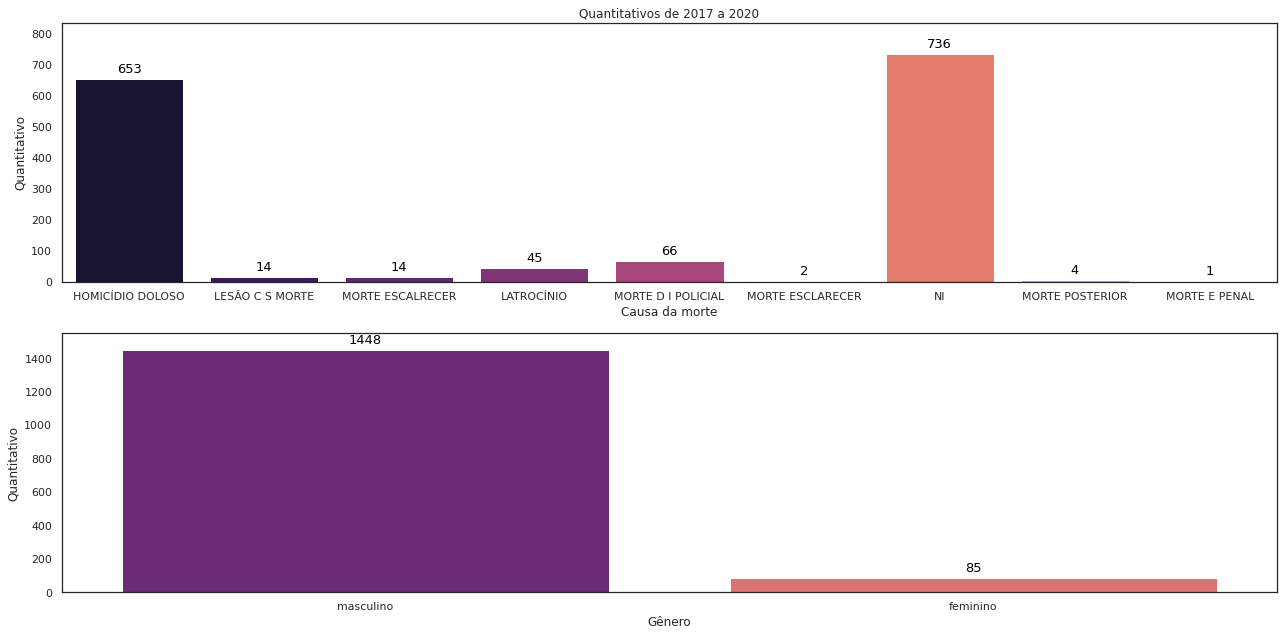

In [17]:
ymaximo_g03 = df_vslz.groupby(['Classificação'])['ID'].count().max()
ymaximo_g04 = df_vslz.groupby(['Sexo'])['ID'].count().max()

sns.set(style="white")
fig, axe = plt.subplots(2,1, figsize=(18,9))

#GRÁFICO 03
#sns.countplot(df_vslz['Classificação'], palette='magma', ax=axe[0,0]) 
sns.countplot(df_vslz['Classificação'], palette='magma', ax=axe[0])

axe[0].set_title('Quantitativos de 2017 a 2020')
axe[0].set_ylabel('Quantitativo')
axe[0].set_xlabel('Causa da morte')
axe[0].set_ylim(0, ymaximo_g03 + 100)
for p in axe[0].patches:
             #Não tulizaremos valores decimais nos rótulos
             #ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             axe[0].annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 10),
                 textcoords='offset points')

#GRÁFICO 04
sns.countplot(df_vslz['Sexo'], palette='magma', ax=axe[1])
#axe[1].set_title('Gênero da vítima')
axe[1].set_ylabel('Quantitativo')
axe[1].set_xlabel('Gênero')
axe[1].set_ylim(0, ymaximo_g04 + 100)
for p in axe[1].patches:
             #Não tulizaremos valores decimais nos rótulos
             #ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             axe[1].annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 10),
                 textcoords='offset points')


fig.show()
#
fig.tight_layout()


In [18]:
#Forma alternativa para gŕafico de gênero
#sns.catplot(x="Sexo", kind="count", palette="Set2", data=df_vslz);

Tratamento dos gráficos para valores segmentados por ano

In [19]:
df_vslz['Data'].dt.year

0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
1531    2020
1532    2020
1533    2020
1534    2020
1535    2020
Name: Data, Length: 1536, dtype: int64

In [20]:
df_vslz['Data'].dt.year.value_counts()


2017    650
2018    408
2019    329
2020    149
Name: Data, dtype: int64

Com os filtros do DataFrame estabelecidos, foi criado os valores segmentados por ano.

<bound method Figure.tight_layout of <Figure size 1008x576 with 1 Axes>>

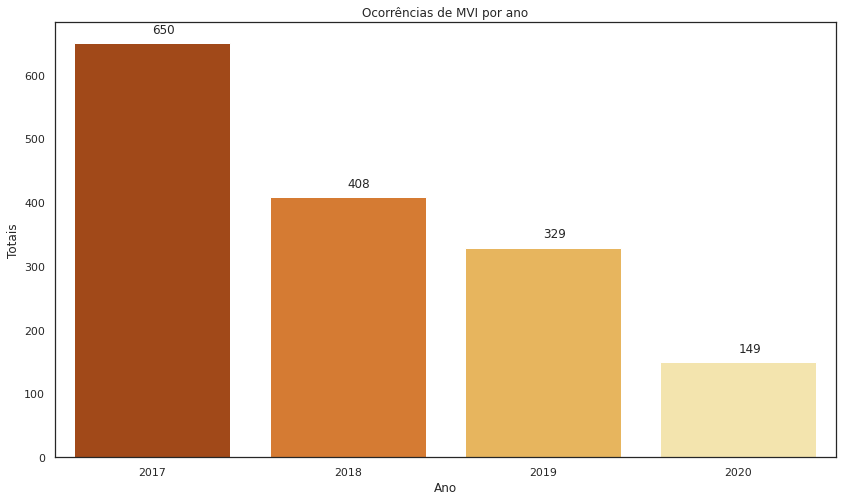

In [21]:
x = df_vslz['Data'].dt.year
sns.set(style='white')
fig, ax = plt.subplots(figsize = (14,8))
sns.countplot(x, palette='YlOrBr_r', ax=ax)
ax.set_title('Ocorrências de MVI por ano')
ax.set_xlabel('Ano')
ax.set_ylabel('Totais')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
               xytext=(0,10), textcoords='offset points' )
#fig.autofmt_xdate()
fig.tight_layout

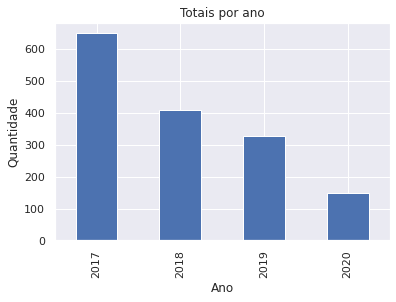

In [22]:
#Rotina alternativa
y = df_vslz['Data'].dt.year.value_counts()
sns.set()
y.plot(kind='bar')
plt.title('Totais por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
fig.autofmt_xdate()

##RECORTE

Será realizado o recorte dos instrumentos utilizados segmentados por municípios da Grande Ilha.

O novo DataFrame será criado a partir do pivotamento do DataFrame original, utilizando  a variável `Município` como coluna, a variável `ID` como index e os dados da variável `Causa_morte` como valores.

In [23]:
#pivotamento para criação de novo DataFrame 
df_instrm = pd.pivot(df_vslz, values='Causa_morte',index='ID', columns='Município')

In [24]:
#Visualização do novo DataFrame
df_instrm

Município,NaN,-,Paço do Lumiar,Raposa,São José de Ribamar,São Luís
ID,,,,,,
1,NaN,NaN,NaN,NaN,NaN,ARMA BRANCA
2,NaN,NaN,NaN,NaN,NaN,ARMA DE FOGO
3,NaN,NaN,NaN,NaN,NaN,ARMA DE FOGO
4,NaN,NaN,NaN,NaN,NaN,ARMA DE FOGO
5,NaN,NaN,NaN,NaN,NaN,ARMA DE FOGO
...,...,...,...,...,...,...
1532,NaN,NaN,NaN,NaN,NaN,ARMA DE FOGO
1533,NaN,NaN,NaN,NaN,ARMA DE FOGO,NaN
1534,NaN,NaN,NaN,NaN,NaN,OUTROS MEIOS


Realizar a contagem dos registros de Causa da Morte / Instrumento utilizado para cada município, de 2017 a 2020.

In [25]:
#Contagem das ocorrências de Causa da Morte
for muni in df_instrm.columns:
    print(muni)
    print('==========')
    print(df_instrm[muni].value_counts())
    print('\n')

nan
ARMA DE FOGO    1
Name: nan, dtype: int64


-
ARMA DE FOGO    4
ESPANCAMENTO    1
ARMA BRANCA     1
Name: -, dtype: int64


Paço do Lumiar
ARMA DE FOGO       69
ARMA BRANCA        28
OUTROS MEIOS        6
ESPANCAMENTO        2
ESTRANGULAMENTO     2
-                   1
Name: Paço do Lumiar, dtype: int64


Raposa
ARMA DE FOGO    17
ARMA BRANCA      5
Name: Raposa, dtype: int64


São José de Ribamar
ARMA DE FOGO       166
ARMA BRANCA         43
ESPANCAMENTO        10
OUTROS MEIOS         8
ESTRANGULAMENTO      1
Name: São José de Ribamar, dtype: int64


São Luís
ARMA DE FOGO       897
ARMA BRANCA        188
ESPANCAMENTO        40
OUTROS MEIOS        34
ESTRANGULAMENTO     12
Name: São Luís, dtype: int64




Visualização gráfica das ocorrências acima.

In [26]:
#função para geração do rótulo
def rotulo(ax):
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
               xytext=(0,10), textcoords='offset points' )

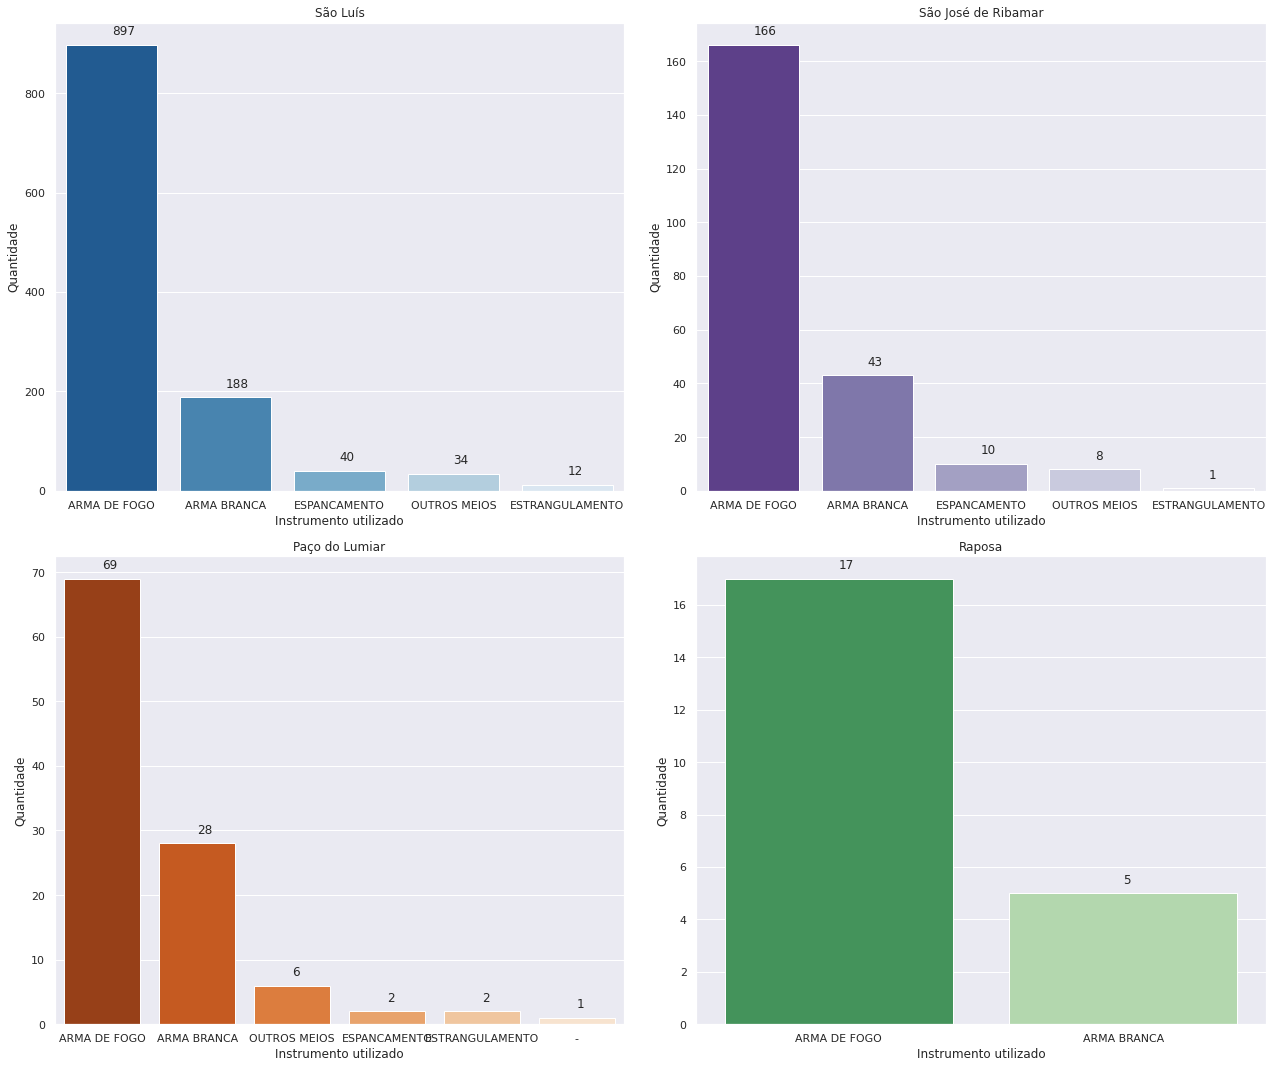

In [27]:
#Gerar gráfico para Causa da morte para os municípios da Grande Ilha
fig, ax=plt.subplots(2,2, figsize=(18,15))
sns.set(style='white')
sns.countplot('São Luís', palette='Blues_r', data= df_instrm, ax=ax[0,0],
              order = df_instrm['São Luís'].value_counts().index) #ordem decrescente
ax[0,0].set_title('São Luís')
ax[0,0].set_xlabel('Instrumento utilizado')
ax[0,0].set_ylabel('Quantidade')
rotulo(ax[0,0])


sns.countplot('São José de Ribamar', palette='Purples_r' ,data=df_instrm, ax=ax[0,1],
              order = df_instrm['São José de Ribamar'].value_counts().index)
ax[0,1].set_title('São José de Ribamar')
ax[0,1].set_xlabel('Instrumento utilizado')
ax[0,1].set_ylabel('Quantidade')
rotulo(ax[0,1])

sns.countplot('Paço do Lumiar', palette='Oranges_r', data=df_instrm, ax=ax[1,0],
              order = df_instrm['Paço do Lumiar'].value_counts().index)
ax[1,0].set_title('Paço do Lumiar')
ax[1,0].set_xlabel('Instrumento utilizado')
ax[1,0].set_ylabel('Quantidade')
rotulo(ax[1,0])

sns.countplot('Raposa', palette='Greens_r', data=df_instrm, ax=ax[1,1],
              order = df_instrm['Raposa'].value_counts().index)
ax[1,1].set_title('Raposa')
ax[1,1].set_xlabel('Instrumento utilizado')
ax[1,1].set_ylabel('Quantidade')
rotulo(ax[1,1])

fig.show

#fig.autofmt_xdate()
fig.tight_layout()

##2020
Vamos trabalhar apenas com o ano de 2020, realizando o pivotamento por bairros de cada município.

In [28]:
df_2020mvi = df_vslz[df_vslz['Data'].dt.year == 2020]

In [29]:
df_2020mvi.head()

,ID,Vítima,Data,Sexo,Idade,Horário,Causa_morte,Local,Município,Classificação
188,189,Erinaldo Santos Lindoso,2020-03-20,masculino,33.0,1900-01-01 03:40:00,ARMA DE FOGO,Anjo da Guarda,São Luís,MORTE D I POLICIAL
200,201,Jerson Coelho,2020-03-26,masculino,31.0,1900-01-01 12:00:00,ARMA DE FOGO,Liberdade,São Luís,MORTE D I POLICIAL
201,202,Iranilson Lucas Silva Costa,2020-03-26,masculino,19.0,1900-01-01 12:00:00,ARMA DE FOGO,Liberdade,São Luís,MORTE D I POLICIAL
1390,1391,Jose Alexandre Mota Soares,2020-01-01,masculino,46.0,1900-01-01 05:27:00,ARMA DE FOGO,Vila Valian,São Luís,HOMICÍDIO DOLOSO
1391,1392,Cosmo Portela de Carvalho,2020-01-02,masculino,19.0,1900-01-01 09:30:00,ARMA BRANCA,Vila Magril,São Luís,HOMICÍDIO DOLOSO


In [30]:
df_2020mvi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 188 to 1535
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             149 non-null    int64         
 1   Vítima         149 non-null    object        
 2   Data           149 non-null    datetime64[ns]
 3   Sexo           149 non-null    object        
 4   Idade          148 non-null    float64       
 5   Horário        149 non-null    datetime64[ns]
 6   Causa_morte    149 non-null    object        
 7   Local          148 non-null    object        
 8   Município      148 non-null    object        
 9   Classificação  149 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 12.8+ KB


In [31]:
df_bairro = pd.pivot(df_2020mvi, values='Local', index='ID', columns='Município')

In [32]:
for bairro in df_bairro.columns:
    print(bairro)
    print('==========')
    print(df_bairro[bairro].value_counts())
    print('\n')
   

nan
Series([], Name: nan, dtype: int64)


Paço do Lumiar
La Belle Park          2
Parque Araçagy         1
Conjunto Lima Verde    1
Vila Cafeteira         1
Maioba                 1
Sítio Natureza         1
Vila São José – PCL    1
Boa Vista              1
Name: Paço do Lumiar, dtype: int64


Raposa
Vila Laci           1
Parque Florêncio    1
Name: Raposa, dtype: int64


São José de Ribamar
Parque Jair                3
Alto do Turu II            2
Vila Alcione Ferreira      2
Oiteiro                    1
Turiúba                    1
São Brás dos Macacos       1
Vila São Luís – SJR        1
Cohabiano                  1
Mata                       1
Alonso Costa               1
São Raimundo               1
Centro-SJR                 1
Parque Araçagi             1
Vila Roseana Sarney        1
Residencial Turiúba        1
Vila Dr. Julinho           1
Vila São José – SJR        1
vila Mestre Antônio        1
Matinha                    1
Campina                    1
Vila Cafeteira            

In [33]:
#função para geração do rótulo
def rotulo_h(ax):
    for p in ax.patches:
        ax.annotate(p.get_width(), (p.get_x() + p.get_width() / 2., p.get_height()),
               xytext=(0,10), textcoords='offset points' )

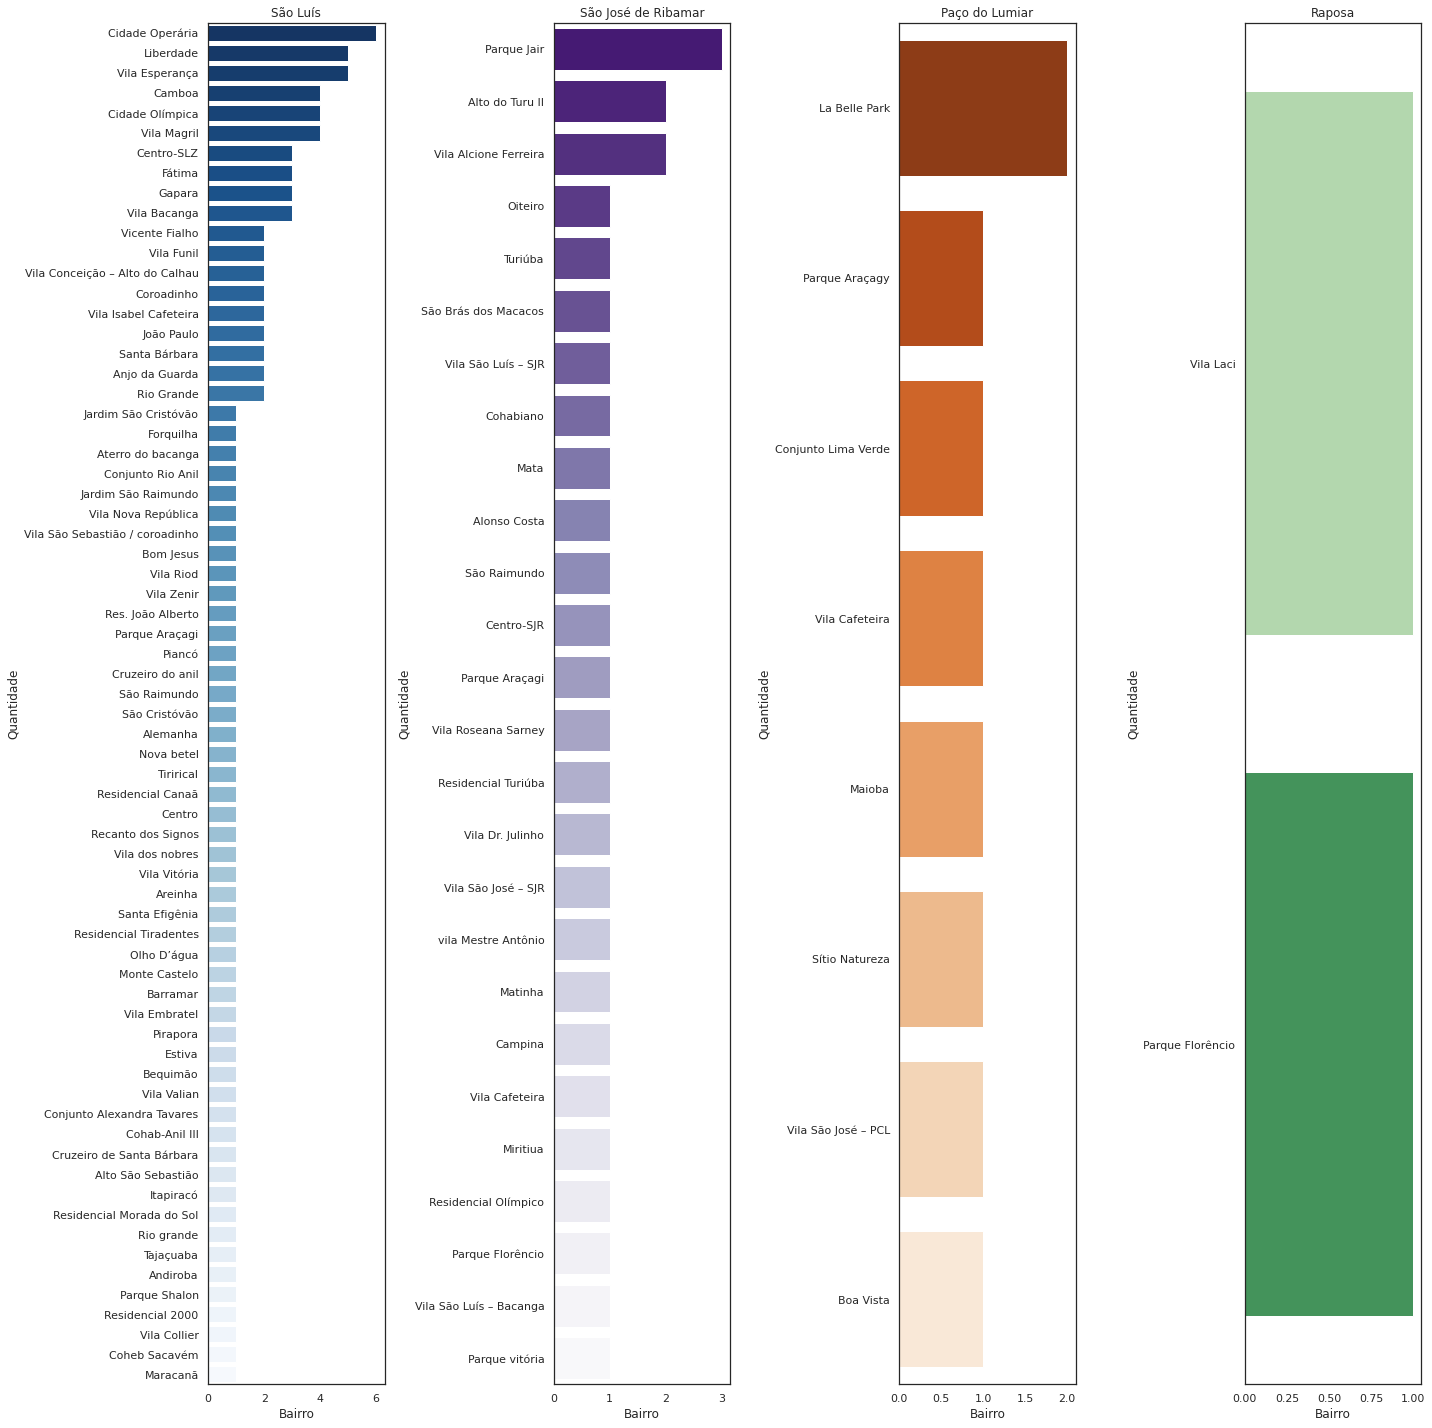

In [34]:
#Gerar gráfico para Causa da morte para os municípios da Grande Ilha
fig, ax=plt.subplots(1,4, figsize=(20,20))
sns.set(style='white')
sns.countplot(y='São Luís', palette='Blues_r', data= df_bairro, ax=ax[0],
              order = df_bairro['São Luís'].value_counts().index) #ordem decrescente
ax[0].set_title('São Luís')
ax[0].set_xlabel('Bairro')
ax[0].set_ylabel('Quantidade')
#rotulo_h(ax[0])



sns.countplot(y='São José de Ribamar', palette='Purples_r' ,data=df_bairro, ax=ax[1],
              order = df_bairro['São José de Ribamar'].value_counts().index)
ax[1].set_title('São José de Ribamar')
ax[1].set_xlabel('Bairro')
ax[1].set_ylabel('Quantidade')
#rotulo(ax[1])

sns.countplot(y='Paço do Lumiar', palette='Oranges_r', data=df_bairro, ax=ax[2],
              order = df_bairro['Paço do Lumiar'].value_counts().index)
ax[2].set_title('Paço do Lumiar')
ax[2].set_xlabel('Bairro')
ax[2].set_ylabel('Quantidade')
#rotulo(ax[2])

sns.countplot(y='Raposa', palette='Greens', data=df_bairro, ax=ax[3],
              order = df_bairro['Raposa'].value_counts().index)
ax[3].set_title('Raposa')
ax[3].set_xlabel('Bairro')
ax[3].set_ylabel('Quantidade')
#rotulo(ax[3])

fig.show

#fig.autofmt_xdate()
fig.tight_layout()

#WORLDCLOUD


Nesta seção utilizamos os dados para montar uma worldcloud (nuvem de palavras) com os termos do dataset.

In [35]:
#instalação dos pacotes necessários
!pip install wordcloud -q

In [36]:
#importe dos pacotes necessários
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [37]:
df_worldcloud = df_vslz.copy()

In [38]:
df_worldcloud

,ID,Vítima,Data,Sexo,Idade,Horário,Causa_morte,Local,Município,Classificação
0,1,Joseilton Silva,2017-01-01,masculino,22.0,1900-01-01 03:01:00,ARMA BRANCA,Coroadinho,São Luís,HOMICÍDIO DOLOSO
1,2,Diogo Silva Ferreira,2017-01-01,masculino,30.0,1900-01-01 00:21:00,ARMA DE FOGO,Liberdade,São Luís,HOMICÍDIO DOLOSO
2,3,Jadiel Pinheiro,2017-01-01,masculino,23.0,1900-01-01 18:30:00,ARMA DE FOGO,São Raimundo,São Luís,HOMICÍDIO DOLOSO
3,4,Ismael Ribeiro Rocha,2017-01-01,masculino,38.0,1900-01-01 20:21:00,ARMA DE FOGO,Vila Conceição – Coroadinho,São Luís,HOMICÍDIO DOLOSO
4,5,Ana Celia Reis Sousa,2017-01-01,feminino,49.0,1900-01-01 23:22:00,ARMA DE FOGO,Vila Vitória,São Luís,HOMICÍDIO DOLOSO
...,...,...,...,...,...,...,...,...,...,...
1531,1532,Eduardo Henrique Maramaldo,2020-05-26,masculino,24.0,1900-01-01 19:30:00,ARMA DE FOGO,Barramar,São Luís,HOMICÍDIO DOLOSO
1532,1533,Fredison Alan Serra Abreu,2020-05-26,masculino,34.0,1900-01-01 18:30:00,ARMA DE FOGO,Vila Cafeteira,São José de Ribamar,HOMICÍDIO DOLOSO
1533,1534,Joana Maria Diniz,2020-05-26,feminino,66.0,1900-01-01 10:00:00,OUTROS MEIOS,Recanto dos Signos,São Luís,HOMICÍDIO DOLOSO
1534,1535,Jadiel Coelho Silva,2020-05-31,masculino,17.0,1900-01-01 15:53:00,ARMA DE FOGO,Cidade Operária,São Luís,HOMICÍDIO DOLOSO


Utilizaremos as colunas vítimas, sexo, causa_morte, local, município e classificação.

In [39]:
df_worldcloud = df_worldcloud[['Vítima', 'Sexo', 'Causa_morte','Local', 'Município', 'Classificação']]

In [40]:
df_worldcloud

,Vítima,Sexo,Causa_morte,Local,Município,Classificação
0,Joseilton Silva,masculino,ARMA BRANCA,Coroadinho,São Luís,HOMICÍDIO DOLOSO
1,Diogo Silva Ferreira,masculino,ARMA DE FOGO,Liberdade,São Luís,HOMICÍDIO DOLOSO
2,Jadiel Pinheiro,masculino,ARMA DE FOGO,São Raimundo,São Luís,HOMICÍDIO DOLOSO
3,Ismael Ribeiro Rocha,masculino,ARMA DE FOGO,Vila Conceição – Coroadinho,São Luís,HOMICÍDIO DOLOSO
4,Ana Celia Reis Sousa,feminino,ARMA DE FOGO,Vila Vitória,São Luís,HOMICÍDIO DOLOSO
...,...,...,...,...,...,...
1531,Eduardo Henrique Maramaldo,masculino,ARMA DE FOGO,Barramar,São Luís,HOMICÍDIO DOLOSO
1532,Fredison Alan Serra Abreu,masculino,ARMA DE FOGO,Vila Cafeteira,São José de Ribamar,HOMICÍDIO DOLOSO
1533,Joana Maria Diniz,feminino,OUTROS MEIOS,Recanto dos Signos,São Luís,HOMICÍDIO DOLOSO
1534,Jadiel Coelho Silva,masculino,ARMA DE FOGO,Cidade Operária,São Luís,HOMICÍDIO DOLOSO


In [41]:
df_worldcloud.shape

(1536, 6)

In [42]:
df_worldcloud.isnull().sum()

Vítima           70
Sexo              3
Causa_morte       0
Local             1
Município         1
Classificação     1
dtype: int64

In [43]:
df_worldcloud.dropna(axis=0,inplace=True )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df_worldcloud.isnull().sum()

Vítima           0
Sexo             0
Causa_morte      0
Local            0
Município        0
Classificação    0
dtype: int64

In [45]:
df_worldcloud.shape

(1463, 6)

In [46]:
lista = []
for i in df_worldcloud.columns:
    text = " ".join(s for s in df_worldcloud[i])
    lista.append(text)


In [47]:
lista

['Joseilton Silva Diogo Silva Ferreira Jadiel Pinheiro Ismael Ribeiro Rocha Ana Celia Reis Sousa Luan Castro Silva Josenilton Franklin Moura Pereira Edivaldo Alves dos Reis Emilson Ferreira Correia Derik Patrick Nna Campos Igor Moreira dos Santos Italo da Silva Oliveira Francines Rodrigues Soares Carlos Alberto Rocha Aragão Jonathan Rosa Nascimento Hugo Leonardo da Silva Santos Elizaldo Mendes Gomes Reginaldo Mendes Souza Jose dos Reis Lima Barros Maxsuwel Silva Cantanhede Jose Renato Reis da Silva Leonardo Reis da Silva Kellvy Silva Costa Washigton da Silva Serra Jhon Maycon Leite Pereira Raimundo Nonato Soares Correa Neryson Ferreira dos Santos Joseilson Silva e Silva Não Identificado Nairon de Jesus Pinto Mendes Carlos Vinicius Mendes da Silva Jardson Carvalho Meireles Valdemar Diniz Osmar Silva Ferreira Vinicius Viana Pires Wallan Machado Costa Marcos Vinicius Baltazar Santos Josias Batista Rabelo Gilmar Silveira Baldez Wagno da Conceição Costa Jackson Araujo Machado Marcus ARMA BR

In [48]:
texto2 = str(lista)

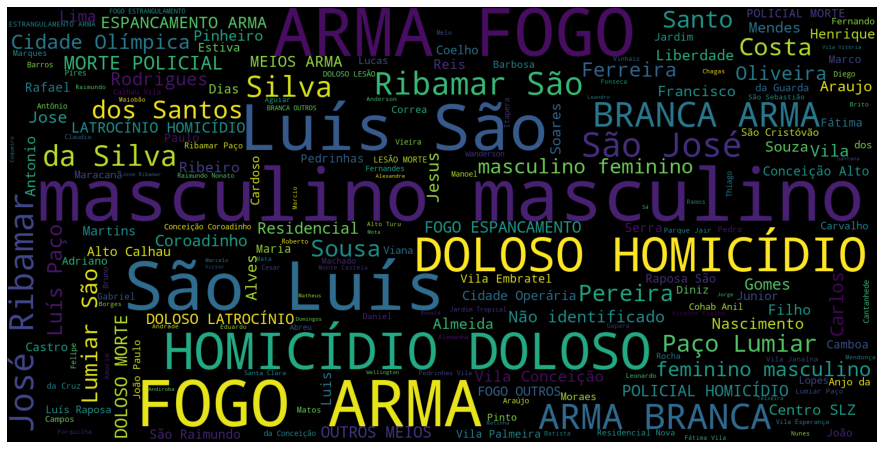

In [52]:
#Definir as stopwords
stopwords = set(STOPWORDS)
stopwords.update(['de', 'NI'])


#Criar a nuvem de palavras
wordcloud = WordCloud(stopwords = stopwords,
                      background_color='black',
                      width=1600, height=800).generate(texto2)


#criar a imagem
fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)

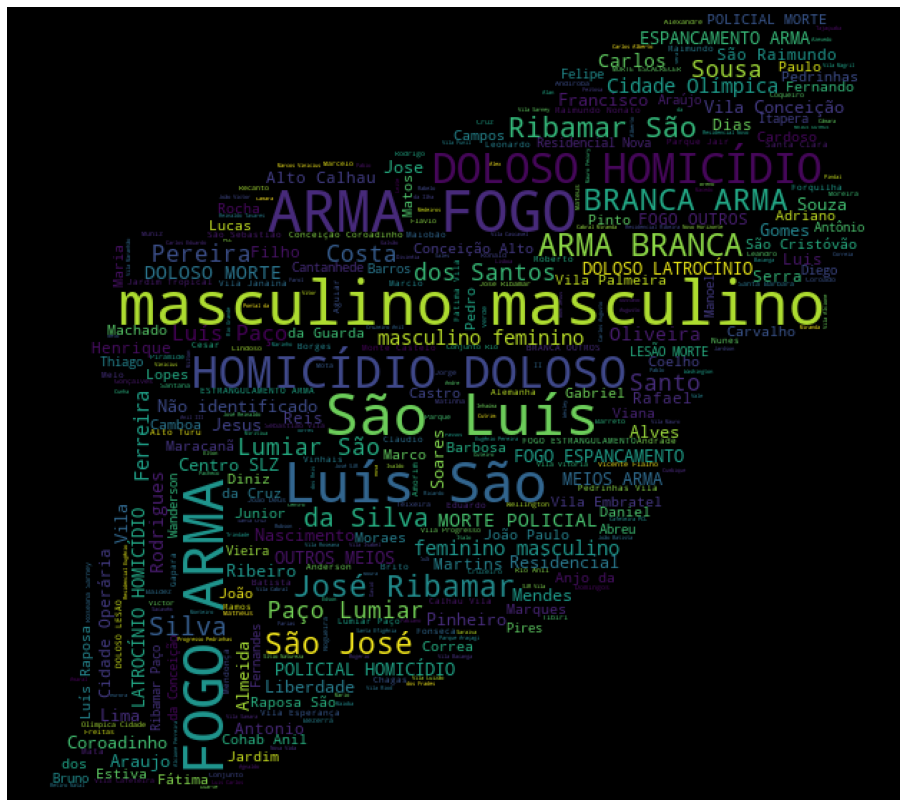

In [54]:
# endereço LOCAL da SUA imagem
import numpy as np
from PIL import Image
grandeilha_mask = np.array(Image.open("/content/drive/My Drive/Colab Notebooks/dataset/ilaha.png"))
   

#Definir as stopwords
stopwords = set(STOPWORDS)
stopwords.update(['de', 'NI'])


#Criar a nuvem de palavras
wordcloud = WordCloud(stopwords = stopwords,
                      background_color='black',
                      width=1600, height=1600, max_words=2000,
                      mask=grandeilha_mask, max_font_size=200
                      ).generate(texto2)


#criar a imagem
fig, ax = plt.subplots(figsize=(16,16))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
#fig.savefig('ilha_wcloud.png', format='png', dpi=1200)

In [55]:
fig.savefig('ilha_wcloud.png', format='png', dpi=1200)